In [59]:
include("../src/include_file.jl")

extendInitialDataToLinear (generic function with 1 method)

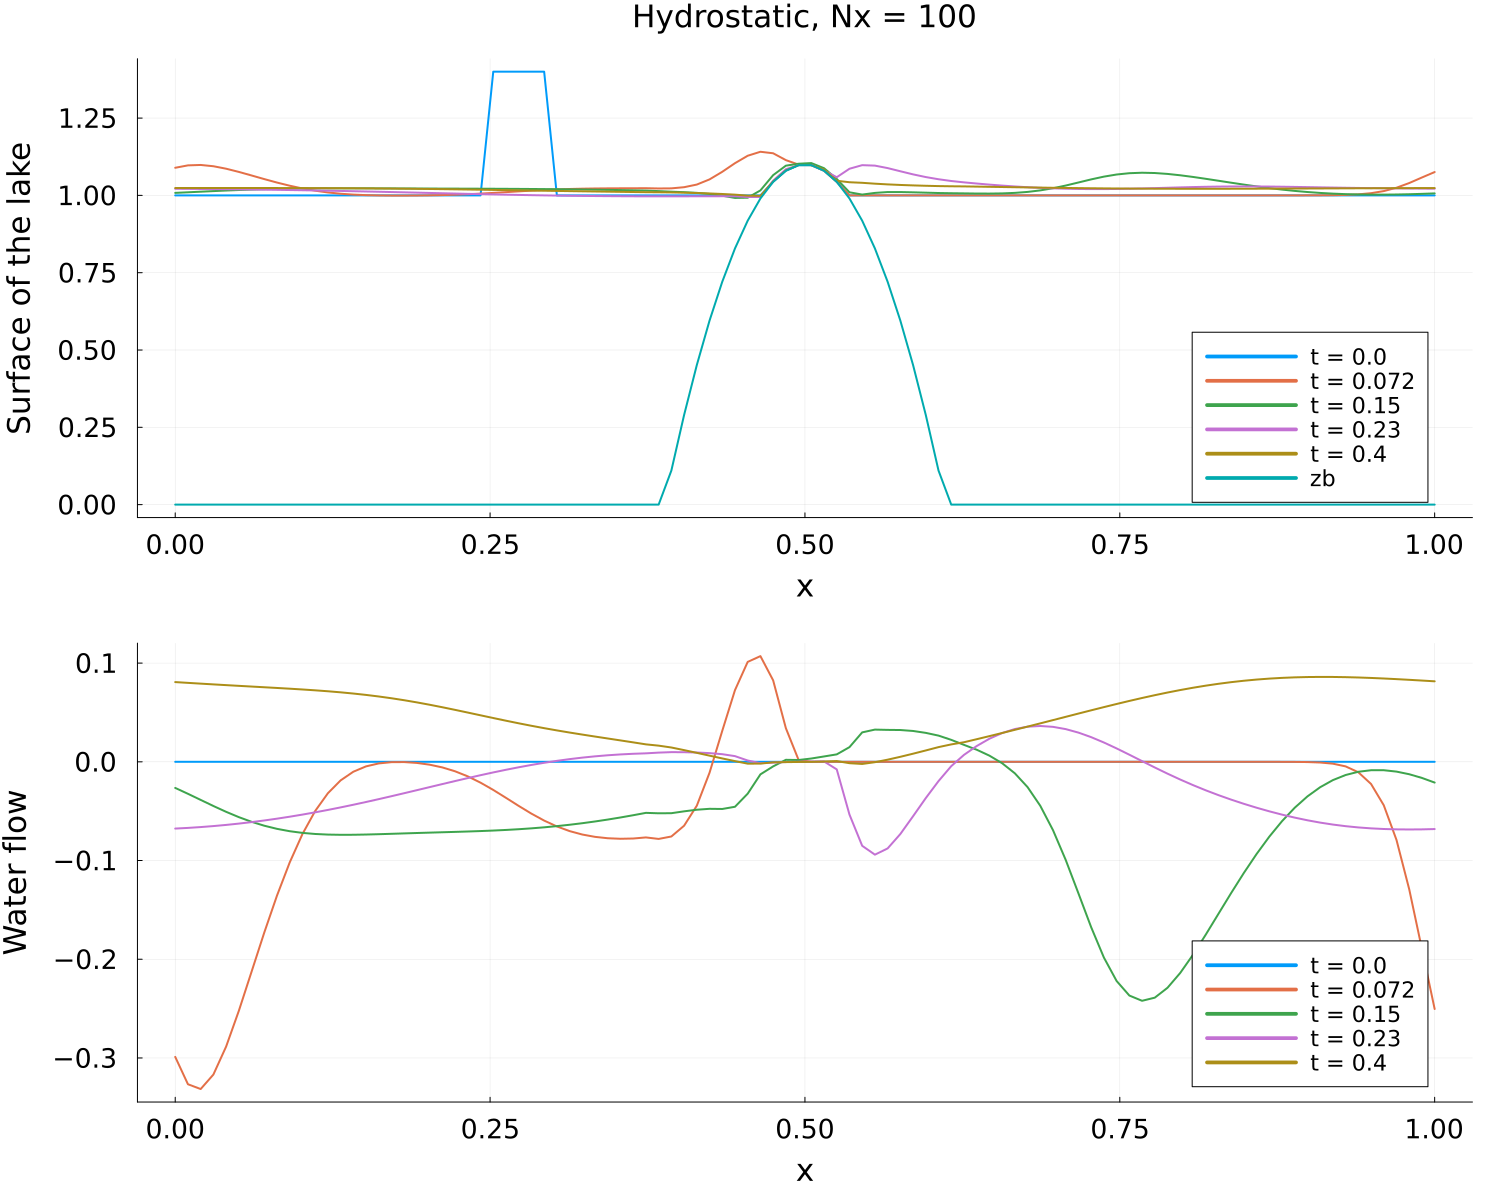

nothing

In [69]:
# Domain definition with a bump topography

topography = bump_zb(width=0.05, height=1.1)
Nx, t0, Tf = 100, 0, 0.4
CFL_factor = 0.5
domain = createUnitInterval(Nx, t0, Tf)
eq = SaintVenant(topography, 1e-10)
addSource!(eq.source, domain)

method = createHydrostatic(CFL_factor, Rusanov)

#v0 = v0_lake_at_rest(domain.x, source_term)
v0 = v0_lake_at_rest_perturbated(domain.x, topography, xleft=0.25, xright=0.3)

# plot(domain.x, domain.sourceVec, label="Topography")
# plot!(domain.x, domain.sourceVec .+ v0[:,1], label="Water surface")
# xlabel!("x")
# ylabel!("z")

solSV = fv_solve(domain, v0, eq, method)
nb_plots = 5
display(plot_fv_sol(solSV, solSV.equation; nb_plots=nb_plots, plotMode=SaveMode()))

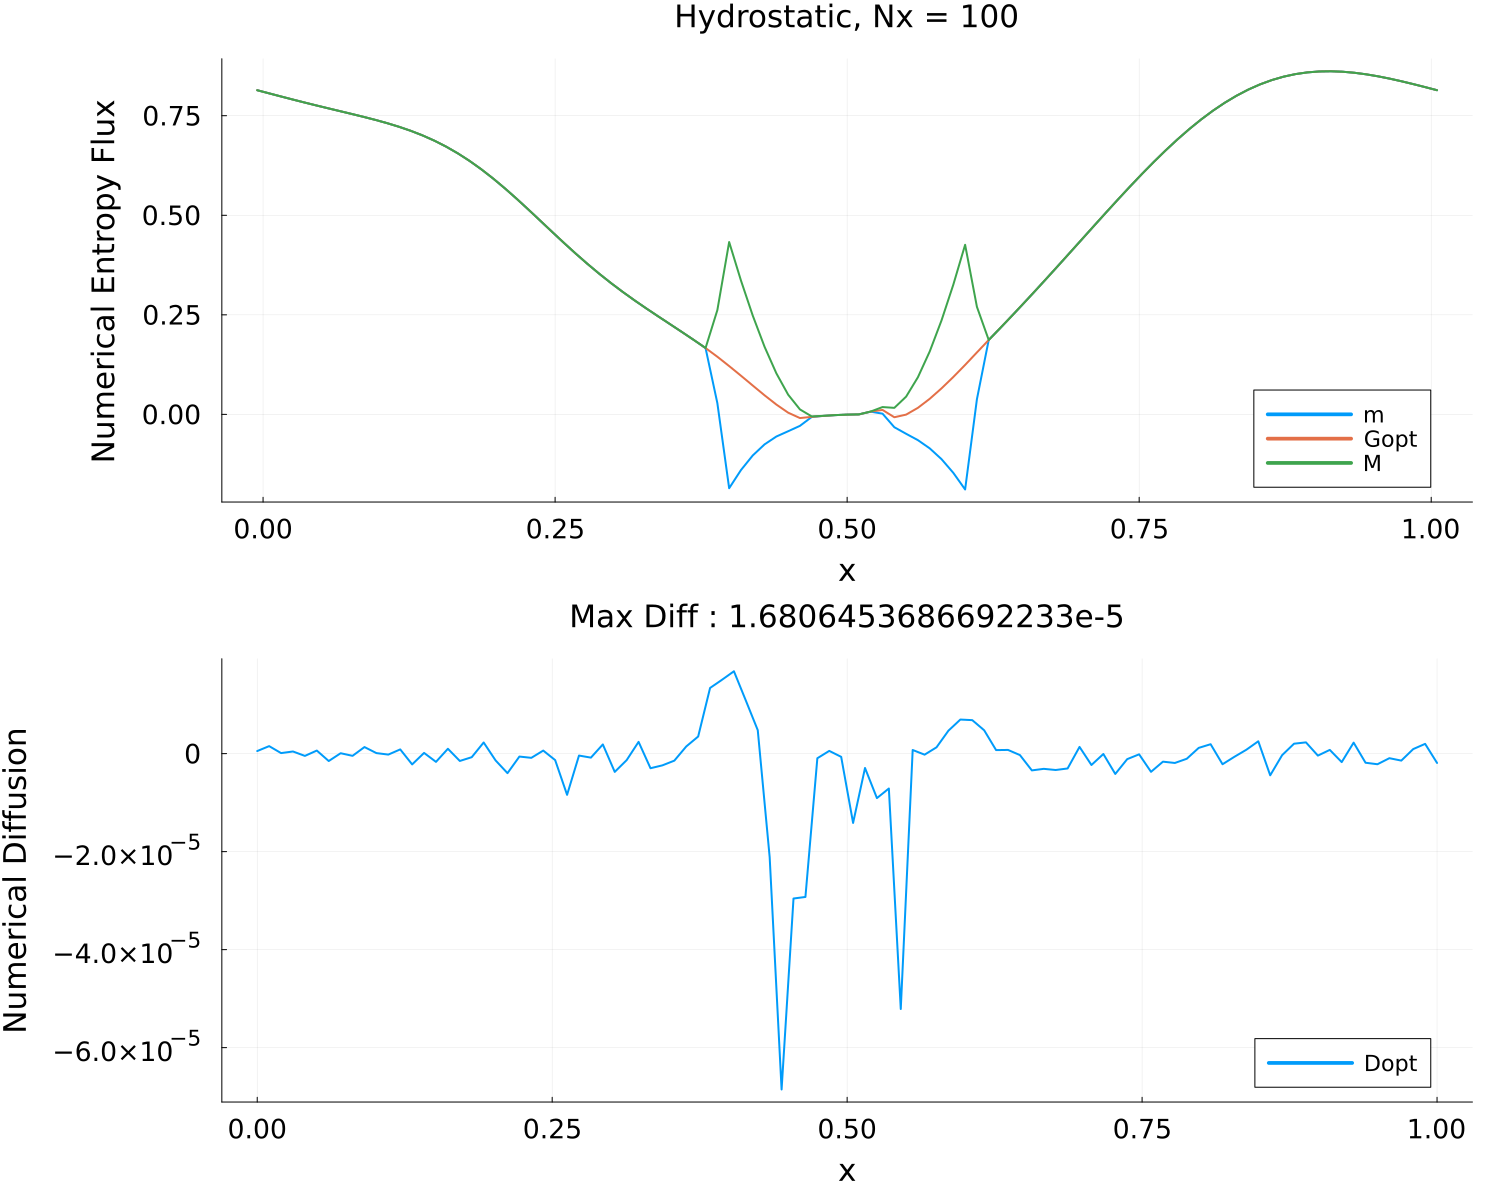

sol = optimize((gamma->begin
                #= c:\Users\marie\Documents\Cours\3ème_année\Stage\NumericalDiffusion\src\opt_diffusion.jl:294 =#
                J(gamma, u_approx[end - 1], u_approx[end], Nx, dx, dt_vec[end], m_vec, M_vec, equation, domain)
            end), gamma_init; g_tol = 1.0e-10, iterations = 100000) =  * Status: success

 * Candidate solution
    Final objective value:     1.277873e-09

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-10

 * Work counters
    Seconds run:   6  (vs limit Inf)
    Iterations:    6627
    f(x) calls:    9416

Maximal diffusion value : 1.6806453686692233e-5


nothing

In [70]:
solEnt = optimize_for_entropy(v0, domain, eq, method, modifiedDataType=maxK())
display(plot_solution(solEnt))

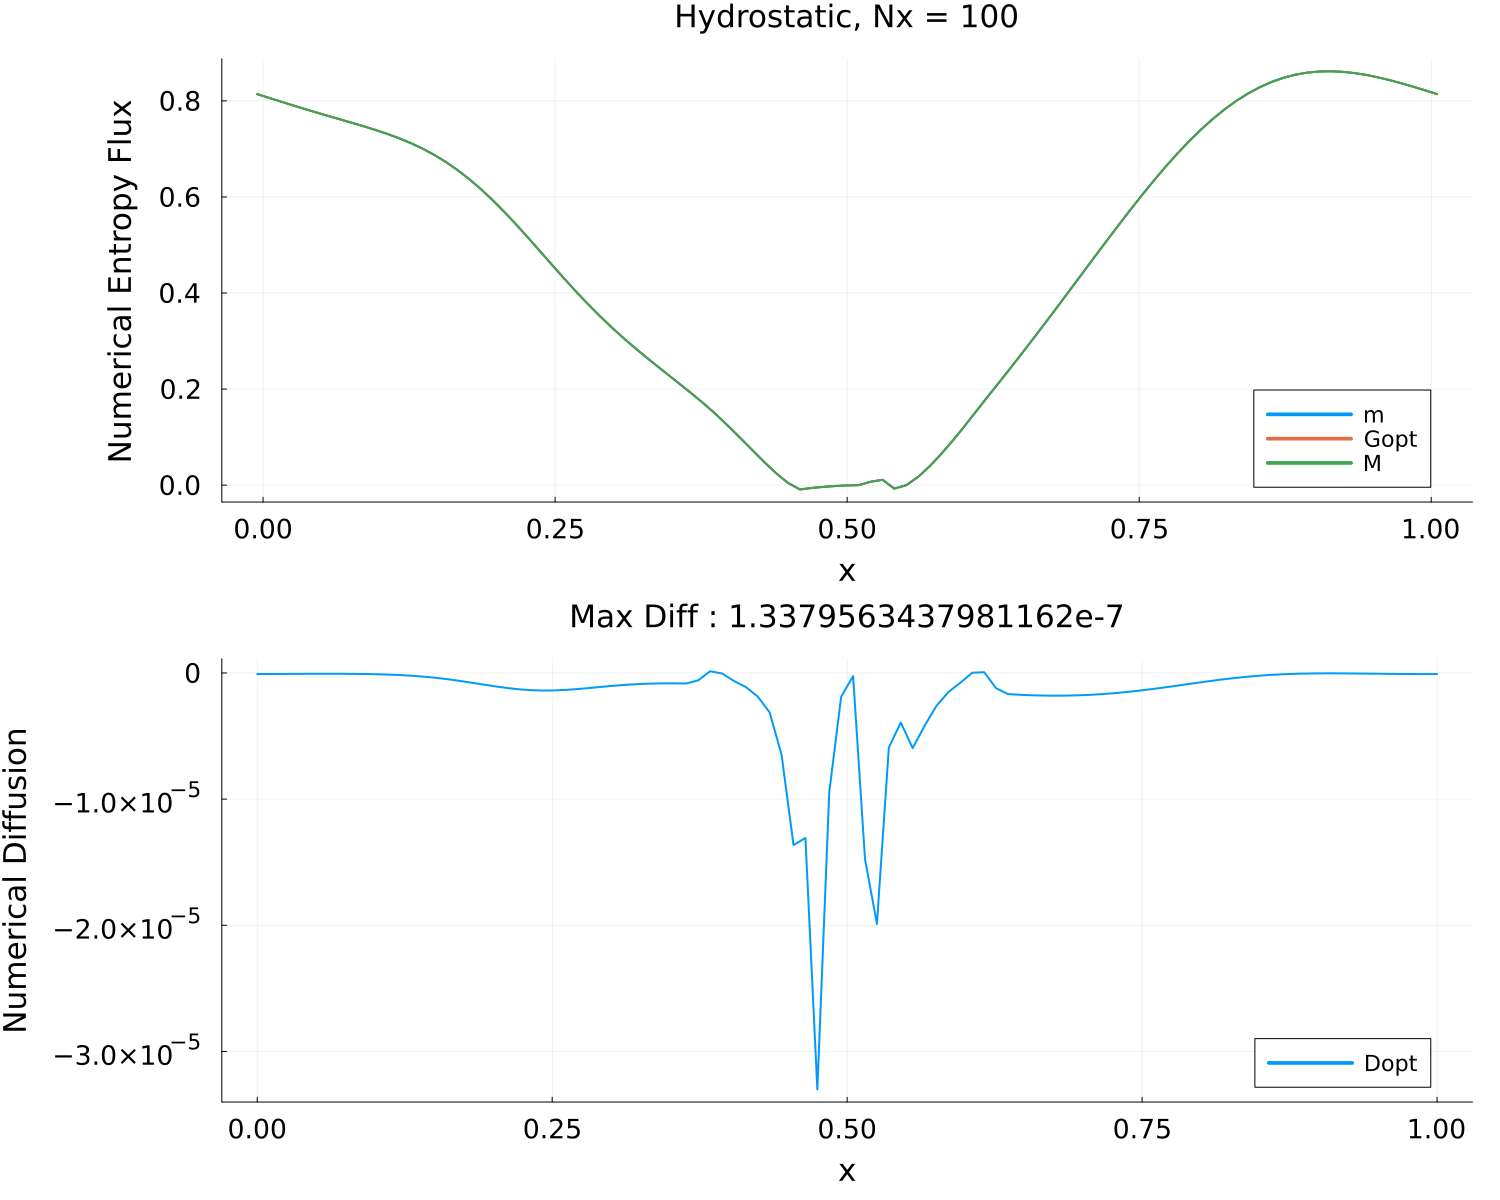

sol = optimize((gamma->begin
                #= c:\Users\marie\Documents\Cours\3ème_année\Stage\NumericalDiffusion\src\opt_diffusion.jl:294 =#
                J(gamma, u_approx[end - 1], u_approx[end], Nx, dx, dt_vec[end], m_vec, M_vec, equation, domain)
            end), gamma_init; g_tol = 1.0e-10, iterations = 100000) =  * Status: success

 * Candidate solution
    Final objective value:     2.169638e-14

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-10

 * Work counters
    Seconds run:   5  (vs limit Inf)
    Iterations:    5953
    f(x) calls:    8592

Maximal diffusion value : 1.3379563437981162e-7


nothing

In [72]:
solEnt = optimize_for_entropy(v0, domain, eq, method, modifiedDataType=meanK(1,1))
display(plot_solution(solEnt))

In [ ]:
# Does the Max diff disminishes when we low down the tolerance ?